In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [3]:
endo_data = pd.read_csv('structured_endometriosis_data.csv')

In [4]:
endo_data.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [ ]:
# color mapping categories for consistency - can change color palette later to match website
categories = ['Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Hormone_Level_Abnormality', 'Infertility', 'Diagnosis']

graph_colors=sns.color_palette("Set2", n_colors=len(categories))
category_colors = dict(zip(categories, graph_colors))

C:\Users\8626j\AppData\Local\Temp\ipykernel_23272\222397515.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


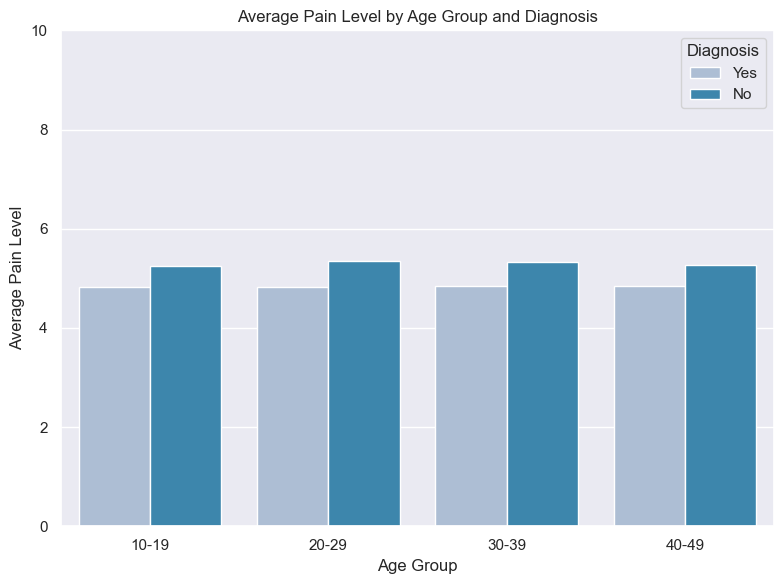

In [ ]:
# bin age groups
bins = [10, 20, 30, 40, 50]  # our data only goes up to 50
labels = ['10-19', '20-29', '30-39', '40-49']
endo_data['Age_Group'] = pd.cut(endo_data['Age'], bins=bins, labels=labels, right=False)

# compute pain level correctly
endo_data['Chronic_Pain_Level'] = pd.to_numeric(endo_data['Chronic_Pain_Level'], errors='coerce')

# swap diagnosis interpretation
endo_data['Diagnosis'] = endo_data['Diagnosis'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(8,6))
sns.barplot(
    x='Age_Group',
    y='Chronic_Pain_Level',
    hue='Diagnosis',
    data=endo_data,
    ci=None,
    palette=['#a6bddb', '#2b8cbe']
)
sns.stripplot(
    x='Age_Group',
    y='Chronic_Pain_Level',
    hue='Diagnosis',
    data=endo_data,
    dodge=True,
    color='black',
    alpha=0.5
)
plt.title('Average Pain Level by Age Group and Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('Chronic Pain Level')
plt.legend(title='Diagnosis')
plt.ylim(0,10)
plt.tight_layout()
plt.show()